In [12]:
import pandas as pd

In [132]:
full_data = pd.read_csv("/grid/gillis/home/lohia/notebooks/mout/expt.pred.txt", sep='\t')

In [643]:
full_data = pd.read_csv("/grid/gillis/home/lohia/notebooks/mout3/expt.pred.txt", sep='\t')

In [644]:
full_data 

chrPerturbationTarget  startPerturbationTarget  endPerturbationTarget  \
0                     chr1                  3691278                3691778   
1                     chr1                  3691278                3691778   
2                     chr1                  3691278                3691778   
3                    chr11                  3283025                3283525   
4                    chr11                  3283745                3284245   
...                    ...                      ...                    ...   
5073                 chr11                  3527205                3527705   
5074                 chr11                  3823125                3823625   
5075                 chr11                  3861225                3861725   
5076                 chr11                  6703145                6703645   
5077                  TRUE                        1                      1   

     GeneSymbol  startTSS   endTSS CellType      padj  Significant  Regulated  \
0        CEP104   3773797  3773797     K562  0.004024         True       True   
1        LRRC47   3713068  3713068     K562  0.007771         True       True   
2         SMIM1   3689324  3689324     K562  0.000642         True       True   
3          HBE1   5291373  5291373     K562  0.944569        False      False   
4          HBE1   5291373  5291373     K562  0.846461        False      False   
...         ...       ...      ...      ...       ...          ...        ...   
5073       HBE1   5291373  5291373     K562  0.989919        False      False   
5074       HBE1   5291373  5291373     K562  0.982456        False      False   
5075       HBE1   5291373  5291373     K562  0.982456        False      False   
5076       HBE1   5291373  5291373     K562  0.912208        False      False   
5077       TRUE         1        1     TRUE  1.000000         True       True   

      EffectSize  IncludeInModel  ABC.ABC.Score  ABC.powerlaw.Score  \
0      -0.293432            True       0.029659            0.034781   
1      -0.331178            True       0.067592            0.088558   
2      -0.472019            True       0.175227            0.284546   
3       0.029242            True       0.000159            0.000062   
4       0.024296            True       0.000245            0.000095   
...          ...             ...            ...                 ...   
5073    0.067175            True       0.000000            0.000000   
5074    0.018107            True       0.000000            0.000000   
5075    0.035686           False       0.000000            0.000000   
5076    0.107887            True       0.000000            0.000000   
5077    1.000000            True       1.000000            1.000000   

      ABC.rawcontact.Score  ABC.distance  ABC.activity_base  
0                 0.047010       81935.5          14.308345  
1                 0.110486       21206.5          14.308345  
2                 0.222547        2511.5          14.308345  
3                 0.000005     2008032.0           0.952796  
4                 0.000008     2007458.0           1.473461  
...                    ...           ...                ...  
5073              0.000000           inf           0.000000  
5074              0.000000           inf           0.000000  
5075              0.000000           inf           0.000000  
5076              0.000000           inf           0.000000  
5077              1.000000           1.0           1.000000  

[5078 rows x 17 columns]

In [220]:
full_data[['IncludeInModel']].sum()

IncludeInModel    3839
dtype: int64

In [160]:
full_data[['Significant']].sum()

Significant    205
dtype: int64

In [161]:
full_data[['Regulated']].sum()

Regulated    140
dtype: int64

In [645]:
full_data = full_data.head(-1)

In [135]:
full_data[(full_data['Regulated'] == True) & (full_data['EffectSize'] < 0) ]['EffectSize'].dropna().max()

-0.02608724

In [49]:
full_data[full_data['padj.x'] == 1.19662179462e-202]

chrPerturbationTarget  startPerturbationTarget  endPerturbationTarget  \
4599                  chrX                 48644125               48645245   

     GeneSymbol  startTSS    endTSS CellType  Significant  Regulated  \
4599       PLP2  49028183  49028183     K562         True      False   

      EffectSize  IncludeInModel         padj.x  \
4599    0.522711           False  1.196622e-202   

      closestGene.EachGeneIsRegulatedByClosestEnhancer         padj.y  \
4599                                                 0  1.196622e-202   

      closestEnhancer.EachEnhRegulatesClosestGene           padj  \
4599                                          0.0  1.196622e-202   

      ABC.ABC.Score  ABC.distance  ABC.activity_base  
4599       0.005058      383517.0            9.59257

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
% inline matplotlib 

UsageError: Line magic function `%` not found.


In [136]:
sns.scatterplot(data=full_data[full_data['EffectSize']<-0.03], x='EffectSize',y='padj.x', hue='Regulated')


ValueError: Could not interpret value `padj.x` for parameter `y`

In [646]:
full_data = full_data[full_data['IncludeInModel']==True]

In [647]:
full_data = full_data[full_data['chrPerturbationTarget']!='chrX']

In [711]:
full_data['true_pos'] = [1 if x == True else 0 for x in full_data['Regulated']]
full_data['true_neg'] = [0 if x == True else 1 for x in full_data['Regulated']]
full_data['distance'] = [1/x for x in full_data['ABC.distance']]

/grid/it/data/elzar/easybuild/software/Anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/grid/it/data/elzar/easybuild/software/Anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/grid/it/data/elzar/easybuild/software/Anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is tryin

In [712]:
full_data = full_data[full_data['distance']!=0]

In [397]:

full_data['true_pos'] = [1 if (x <= .05) & (y < -0.1)  else 0 for x,y in zip(full_data['padj'], full_data['EffectSize'])]
full_data['true_neg'] = [0 if (x <= .05) & (y < -0.1)  else 1 for x,y in zip(full_data['padj'], full_data['EffectSize'])]



In [702]:
full_data['true_pos'] = [1 if (x <= .2) & (y < -0.01)  else 0 for x,y in zip(full_data['padj'], full_data['EffectSize'])]
full_data['true_neg'] = [0 if (x <= .2) & (y < -0.01)  else 1 for x,y in zip(full_data['padj'], full_data['EffectSize'])]
#full_data['keep'] = [1 if (x <= .05) & (y > 0)  else 0 for x,y in zip(full_data['padj'], full_data['EffectSize'])]


/grid/it/data/elzar/easybuild/software/Anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/grid/it/data/elzar/easybuild/software/Anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [690]:
full_data.columns

Index(['chrPerturbationTarget', 'startPerturbationTarget',
       'endPerturbationTarget', 'GeneSymbol', 'startTSS', 'endTSS', 'CellType',
       'padj', 'Significant', 'Regulated', 'EffectSize', 'IncludeInModel',
       'ABC.ABC.Score', 'ABC.powerlaw.Score', 'ABC.rawcontact.Score',
       'ABC.distance', 'ABC.activity_base', 'true_pos', 'true_neg',
       'distance'],
      dtype='object')

In [61]:
import bottleneck
import scipy.stats as stats
import numpy as np
import pandas as pd

def prec_recall (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    df_trial = df_trial.reset_index()
    #df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
    #df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
    df_trial['true_pos_cum'] = df_trial['true_pos'].cumsum()
    df_trial['true_neg_cum'] = df_trial['true_neg'].cumsum()
    df_trial['PPV'] = df_trial['true_pos_cum'] / (df_trial['true_pos_cum'] + df_trial['true_neg_cum'] )
    df_trial['recall'] = df_trial['true_pos_cum']  / (df_trial['true_pos'].sum())
    #df_trial['recall'] = df_trial['recall'].round(1)
    #df_trial['f-score'] = (2 * df_trial['PPV'] * df_trial['recall']) / (df_trial['PPV'] + df_trial['recall'])
    #df_trial.iloc[df_trial['f-score'].idxmax()]
    return list(zip(df_trial['recall'].tolist(), df_trial['PPV'].tolist()))



def calc_auroc (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, df_trial[predicted_score].values)
    df_trial['p'] = [y if x==1 else 0 for x,y in zip(df_trial['true_pos'], predicts2)]
    #print (df_trial['p'].sum())
    if df_trial['true_neg'].sum() == 0 or df_trial['true_pos'].sum() == 0:
        return np.nan
        
    else:
        return (((df_trial['p'].sum() /df_trial['true_pos'].sum() )- (df_trial['true_pos'].sum() + 1)/2)) / df_trial['true_neg'].sum()
    
def calc_auc_curve (df_trial,predicted_score='predicted_score'):
    df_trial = df_trial.sort_values(by=[predicted_score], ascending=False)
    df_trial['true_neg_tmp'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
    df_trial['true_pos_tmp'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
    df_trial['true_pos_cum'] = df_trial['true_pos_tmp'].cumsum()
    df_trial['true_neg_cum'] = df_trial['true_neg_tmp'].cumsum()
    #return dict(zip(df_trial['true_neg_cum'].tolist(), df_trial['true_pos_cum'].tolist()))
    #df_trial['true_neg_cum'] = df_trial['true_neg_cum'].round(1)
    return list(zip(df_trial['true_neg_cum'].tolist(), df_trial['true_pos_cum'].tolist()))



In [62]:
predicted_score = [8,9,9,8,8,6,5,5,3,2]
true_case = [0,1,1,1,1,1,0,0,0,0]
true_pos = [0,1,1,1,1,1,0,0,0,0]
true_neg = [1 if score==0 else 0 for score in true_pos]
df_trial = pd.DataFrame(list(zip(predicted_score, true_pos, true_neg)), columns =['predicted_score', 'true_pos', 'true_neg']) 


In [753]:
df_trial = full_data[full_data['ABC.distance']>1000000]
df_raw = full_data[full_data['ABC.distance']>1000000]
df_dist = full_data[full_data['ABC.distance']>1000000]

In [751]:
df_trial['true_pos'].sum()

5

In [749]:
df_trial['true_neg'].sum()

6

In [641]:
full_data['true_pos'].sum()

82

In [642]:
full_data['true_neg'].sum()

2809

In [421]:
df_trial = full_data[full_data['keep']!=1]

df_dist = full_data[full_data['keep']!=1]
df_trial = df_trial[df_trial['ABC.distance']>500000]

df_dist = df_dist[df_dist['ABC.distance']>500000]

In [728]:
df_trial = full_data
df_raw = full_data
df_dist = full_data

In [738]:
calc_auroc(df_trial,predicted_score='ABC.ABC.Score')

0.9615600448933782

In [739]:
calc_auroc(df_raw,predicted_score='ABC.rawcontact.Score')

0.894304152637486

In [740]:
calc_auroc(df_dist,predicted_score='distance')

0.44458473625140293

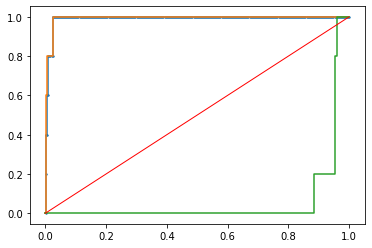

In [752]:
df_trial = df_trial.sort_values(by=['ABC.ABC.Score'], ascending=False)
df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
df_trial['true_pos_cum'] = df_trial['true_pos'].cumsum()
df_trial['true_neg_cum'] = df_trial['true_neg'].cumsum()

df_dist = df_dist.sort_values(by=['distance'], ascending=False)
df_dist['true_neg'] = df_dist['true_neg']/ df_dist['true_neg'].sum()
df_dist['true_pos'] = df_dist['true_pos']/ df_dist['true_pos'].sum()
df_dist['true_pos_cum'] = df_dist['true_pos'].cumsum()
df_dist['true_neg_cum'] = df_dist['true_neg'].cumsum()


df_raw = df_raw.sort_values(by=['ABC.rawcontact.Score'], ascending=False)
df_raw['true_neg'] = df_raw['true_neg']/ df_raw['true_neg'].sum()
df_raw['true_pos'] = df_raw['true_pos']/ df_raw['true_pos'].sum()
df_raw['true_pos_cum'] = df_raw['true_pos'].cumsum()
df_raw['true_neg_cum'] = df_raw['true_neg'].cumsum()

fig, axes = plt.subplots()
axes.scatter([0] + df_trial['true_neg_cum'].values, [0] + df_trial['true_pos_cum'].values, s=2)
axes.plot([0] + df_trial['true_neg_cum'].tolist(), [0] + df_trial['true_pos_cum'].tolist())
axes.plot([0] + df_raw['true_neg_cum'].tolist(), [0] + df_raw['true_pos_cum'].tolist())
axes.plot([0] + df_dist['true_neg_cum'].tolist(), [0] + df_dist['true_pos_cum'].tolist())
#axes.set_ylim([0,1])
#axes.set_xlim([0,1])
axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

In [530]:
df_trial.groupby(['chrPerturbationTarget'])['CellType'].count()

chrPerturbationTarget
chr1        5
chr10       1
chr11     134
chr12     384
chr17      11
chr19    1631
chr20       2
chr3      663
chr6        4
chr7        1
chr8      181
chrX      837
Name: CellType, dtype: int64

In [718]:
df_trial = full_data[full_data['ABC.distance']>200000]
df_raw = full_data[full_data['ABC.distance']>200000]
df_dist = full_data[full_data['ABC.distance']>200000]

In [754]:
df_trial = df_trial.sort_values(by=['ABC.ABC.Score'], ascending=False)
df_trial = df_trial.reset_index()
#df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
#df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
df_trial['true_pos_cum'] = df_trial['true_pos'].cumsum()
df_trial['true_neg_cum'] = df_trial['true_neg'].cumsum()
df_trial['PPV'] = df_trial['true_pos_cum'] / (df_trial['true_pos_cum'] + df_trial['true_neg_cum'] )

df_trial['recall'] = df_trial['true_pos_cum']  / (df_trial['true_pos'].sum())
df_trial['f-score'] = (2 * df_trial['PPV'] * df_trial['recall']) / (df_trial['PPV'] + df_trial['recall'])
df_trial.iloc[df_trial['f-score'].idxmax()]

index                           3829
chrPerturbationTarget           chr8
startPerturbationTarget    130701606
endPerturbationTarget      130701940
GeneSymbol                       MYC
startTSS                   128748314
endTSS                     128748314
CellType                        K562
padj                             0.0
Significant                     True
Regulated                       True
EffectSize                  -0.25125
IncludeInModel                  True
ABC.ABC.Score               0.009474
ABC.powerlaw.Score          0.001297
ABC.rawcontact.Score        0.010932
ABC.distance               1953344.5
ABC.activity_base          12.443295
true_pos                           1
true_neg                           0
distance                    0.000001
true_pos_cum                       4
true_neg_cum                       3
PPV                         0.571429
recall                           0.8
f-score                     0.666667
Name: 6, dtype: object

In [755]:
df_raw = df_raw.sort_values(by=['ABC.rawcontact.Score'], ascending=False)
df_raw = df_raw.reset_index()
#df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
#df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
df_raw['true_pos_cum'] = df_raw['true_pos'].cumsum()
df_raw['true_neg_cum'] = df_raw['true_neg'].cumsum()
df_raw['PPV'] = df_raw['true_pos_cum'] / (df_raw['true_pos_cum'] + df_raw['true_neg_cum'] )

df_raw['recall'] = df_raw['true_pos_cum']  / (df_raw['true_pos'].sum())
df_raw['f-score'] = (2 * df_raw['PPV'] * df_raw['recall']) / (df_raw['PPV'] + df_raw['recall'])
df_raw.iloc[df_raw['f-score'].idxmax()]

index                           3829
chrPerturbationTarget           chr8
startPerturbationTarget    130701606
endPerturbationTarget      130701940
GeneSymbol                       MYC
startTSS                   128748314
endTSS                     128748314
CellType                        K562
padj                             0.0
Significant                     True
Regulated                       True
EffectSize                  -0.25125
IncludeInModel                  True
ABC.ABC.Score               0.009474
ABC.powerlaw.Score          0.001297
ABC.rawcontact.Score        0.010932
ABC.distance               1953344.5
ABC.activity_base          12.443295
true_pos                           1
true_neg                           0
distance                    0.000001
true_pos_cum                       4
true_neg_cum                       2
PPV                         0.666667
recall                           0.8
f-score                     0.727273
Name: 5, dtype: object

In [756]:
df_dist = df_dist.sort_values(by=['ABC.distance'], ascending=True)
df_dist = df_dist.reset_index()
#df_trial['true_neg'] = df_trial['true_neg']/ df_trial['true_neg'].sum()
#df_trial['true_pos'] = df_trial['true_pos']/ df_trial['true_pos'].sum()
df_dist['true_pos_cum'] = df_dist['true_pos'].cumsum()
df_dist['true_neg_cum'] = df_dist['true_neg'].cumsum()
df_dist['PPV'] = df_dist['true_pos_cum'] / (df_dist['true_pos_cum'] + df_dist['true_neg_cum'] )

df_dist['recall'] = df_dist['true_pos_cum']  / (df_dist['true_pos'].sum())
df_dist['f-score'] = (2 * df_dist['PPV'] * df_dist['recall']) / (df_dist['PPV'] + df_dist['recall'])
df_dist.iloc[df_dist['f-score'].idxmax()]

index                            3835
chrPerturbationTarget            chr8
startPerturbationTarget     130709145
endPerturbationTarget       130711645
GeneSymbol                        MYC
startTSS                    128748314
endTSS                      128748314
CellType                         K562
padj                         0.021899
Significant                      True
Regulated                        True
EffectSize                  -0.047932
IncludeInModel                   True
ABC.ABC.Score                0.005793
ABC.powerlaw.Score           0.000837
ABC.rawcontact.Score         0.005421
ABC.distance               1961725.75
ABC.activity_base            8.056555
true_pos                            1
true_neg                            0
distance                     0.000001
true_pos_cum                        5
true_neg_cum                      280
PPV                          0.017544
recall                            1.0
f-score                      0.034483
Name: 284, d

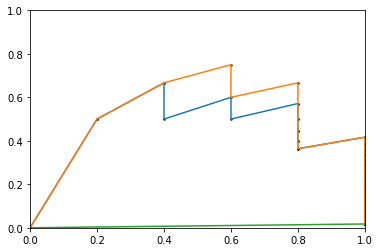

In [757]:
fig, axes = plt.subplots()
axes.scatter(df_trial['recall'], df_trial['PPV'], s=2, color='black')
axes.plot(df_trial['recall'], df_trial['PPV'])
#axes.scatter(df_dist['recall'], df_dist['PPV'], s=2)
axes.plot(df_raw['recall'], df_raw['PPV'])
axes.scatter(df_raw['recall'], df_raw['PPV'], s=2, color='black')
axes.plot(df_dist['recall'], df_dist['PPV'])
axes.set_ylim([0,1])
axes.set_xlim([0,1])
#axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

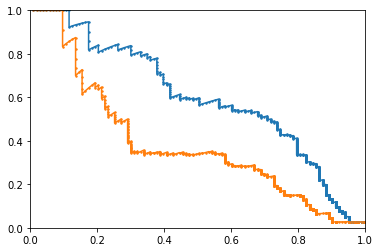

In [145]:
fig, axes = plt.subplots()
axes.scatter(df_trial['recall'], df_trial['PPV'], s=2)
axes.plot(df_trial['recall'], df_trial['PPV'])
axes.scatter(df_dist['recall'], df_dist['PPV'], s=2)
axes.plot(df_dist['recall'], df_dist['PPV'])
axes.set_ylim([0,1])
axes.set_xlim([0,1])
#axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

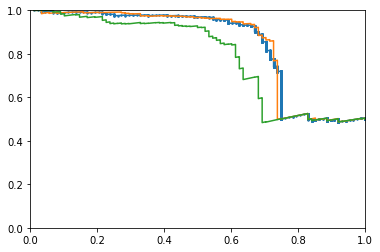

In [453]:
fig, axes = plt.subplots()
axes.scatter(df_trial['recall'], df_trial['PPV'], s=2)
axes.plot(df_trial['recall'], df_trial['PPV'])
#axes.scatter(df_dist['recall'], df_dist['PPV'], s=2)
axes.plot(df_raw['recall'], df_raw['PPV'])
axes.plot(df_dist['recall'], df_dist['PPV'])
axes.set_ylim([0,1])
axes.set_xlim([0,1])
#axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

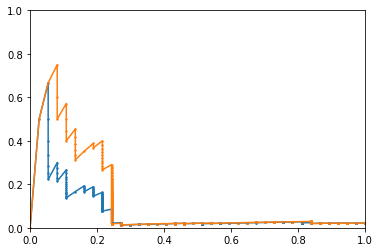

In [316]:
fig, axes = plt.subplots()
axes.scatter(df_trial['recall'], df_trial['PPV'], s=2)
axes.plot(df_trial['recall'], df_trial['PPV'])
axes.scatter(df_dist['recall'], df_dist['PPV'], s=2)
axes.plot(df_dist['recall'], df_dist['PPV'])
axes.set_ylim([0,1])
axes.set_xlim([0,1])
#axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

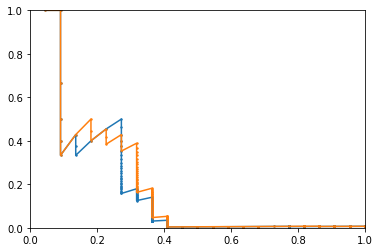

In [333]:
fig, axes = plt.subplots()
axes.scatter(df_trial['recall'], df_trial['PPV'], s=2)
axes.plot(df_trial['recall'], df_trial['PPV'])
axes.scatter(df_dist['recall'], df_dist['PPV'], s=2)
axes.plot(df_dist['recall'], df_dist['PPV'])
axes.set_ylim([0,1])
axes.set_xlim([0,1])
#axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

In [84]:
df_trial.dropna()['true_pos'].tolist()

[0.01,
 0.01,
 0.01,
 0.0,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [118]:
df_dist

chrPerturbationTarget  startPerturbationTarget  endPerturbationTarget  \
0                     chr1                  3691278                3691778   
1                     chr1                  3691278                3691778   
2                     chr1                  3691278                3691778   
3                    chr10                127505227              127505304   
4                    chr11                  3283025                3283525   
...                    ...                      ...                    ...   
5085                  chrX                 50322885               50323405   
5086                  chrX                 50434665               50435165   
5087                  chrX                 50434665               50435165   
5088                  chrX                 50434665               50435165   
5089                  chrX                 50434665               50435165   

     GeneSymbol   startTSS     endTSS CellType  Significant  Regulated  \
0        CEP104    3773797    3773797     K562         True       True   
1        LRRC47    3713068    3713068     K562         True       True   
2         SMIM1    3689324    3689324     K562         True       True   
3          UROS  127511837  127511837     K562         True       True   
4          HBE1    5291373    5291373     K562        False      False   
...         ...        ...        ...      ...          ...        ...   
5085      PQBP1   48755194   48755194     K562        False      False   
5086      GATA1   48644981   48644981     K562        False      False   
5087      HDAC6   48660422   48660422     K562        False      False   
5088       PLP2   49028183   49028183     K562        False      False   
5089      PQBP1   48755194   48755194     K562        False      False   

      EffectSize  ...    padj.x  \
0      -0.293432  ...  0.004024   
1      -0.331178  ...  0.007771   
2      -0.472019  ...  0.000642   
3      -0.850000  ...       NaN   
4       0.029242  ...  0.944569   
...          ...  ...       ...   
5085   -0.045625  ...  0.770449   
5086   -0.032984  ...  0.966121   
5087   -0.061926  ...  0.604627   
5088    0.009913  ...  0.904415   
5089   -0.011122  ...  0.961018   

      closestGene.EachGeneIsRegulatedByClosestEnhancer    padj.y  \
0                                                    0  0.004024   
1                                                    0  0.007771   
2                                                    1  0.000642   
3                                                    0       NaN   
4                                                    0  0.944569   
...                                                ...       ...   
5085                                                 0  0.770449   
5086                                                 0  0.966121   
5087                                                 0  0.604627   
5088                                                 0  0.904415   
5089                                                 0  0.961018   

      closestEnhancer.EachEnhRegulatesClosestGene      padj  ABC.ABC.Score  \
0                                             0.0  0.004024       0.029659   
1                                             0.0  0.007771       0.067592   
2                                             1.0  0.000642       0.175227   
3                                             NaN       NaN            NaN   
4                                             0.0  0.944569       0.000159   
...                                           ...       ...            ...   
5085                                          0.0  0.770449       0.000060   
5086                                          0.0  0.966121       0.000046   
5087                                          0.0  0.604627       0.000046   
5088                                          0.0  0.904415       0.000089   
5089                                          0.0  0.961018       0.000045   

    

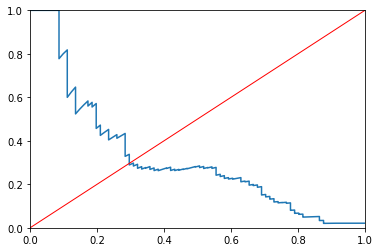

In [122]:
from sklearn import metrics
true_case = [int(x) for x in (df_dist.dropna()['true_pos'].tolist())]
pred_v = [1/x for x in df_dist.dropna()['ABC.distance'].tolist()]
precision, recall, thresholds  = metrics.precision_recall_curve(true_case,pred_v)
fig, axes = plt.subplots()
#axes.scatter([0] + df_trial['true_neg_cum'].values, [0] + df_trial['true_pos_cum'].values, s=2)
axes.plot(recall, precision)
axes.set_ylim([0,1])
axes.set_xlim([0,1])
axes.plot([0, 1], [0, 1], 'red', linewidth=1)
plt.show()

In [80]:
[int(x) for x in (df_trial['true_pos'].tolist())]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [155]:
Rscript /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/test.R \

--predictions /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/pred.table.listing_2.txt \
--experimentalData /grid/gillis/data/lohia//ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/experimentalData/experimentalData.K562-only.txt \
--experimentalPositiveColumn "Regulated" \
--plotConfig /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/plot.config.txt \
--predConfig /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/config/pred.config.txt \
--code /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/comparison.R \
--outDir /grid/gillis/home/lohia/notebooks/mout2


SyntaxError: invalid syntax (<ipython-input-155-b24c01cf75a5>, line 5)

In [ ]:
Rscript /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/test.R \
                --predictions /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/pred.table.listing_2.txt \
                --experimentalData /grid/gillis/data/lohia//ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/experimentalData/experimentalData.K562-only.txt \
                --experimentalPositiveColumn 'Regulated' \
                --cellNameMapping /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/cellNameMapping.txt \
                --plotConfig /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/plot.config.txt \
                --predConfig /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/config/pred.config.txt \
                --code /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/comparison.R  \
                --outDir /grid/gillis/home/lohia/notebooks/mout2/ \
                --ignoreExptMissingPredictions False

In [ ]:
Rscript /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/test.R \
                --predictions /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/pred.table.listing_metahic.txt \
                --experimentalData /grid/gillis/data/lohia//ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/experimentalData/experimentalData.K562-only.txt \
                --experimentalPositiveColumn 'Regulated' \
                --cellNameMapping /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/cellNameMapping.txt \
                --plotConfig /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/plot.config.txt \
                --predConfig /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/config/pred.config_metahic.txt \
                --code /grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/comparison.R  \
                --outDir /grid/gillis/home/lohia/notebooks/mout3/ \
                --ignoreExptMissingPredictions False

In [ ]:
#opt <- list()
#opt$code <- '/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/code/comparison.R'
#TODO - fix the below for here
#opt$predictions <- '/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/pred.table.listing_2.txt'
#opt$experimentalData <- "/grid/gillis/data/lohia//ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/experimentalData/experimentalData.K562-only.txt"
#opt$experimentalData <- '/Users/ruchilohia/Downloads/all_500kb_min.txt'
#opt$experimentalPositiveColumn <- "Regulated"
#opt$cellNameMapping <- "/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/cellNameMapping.txt"
#opt$plotConfig <- "/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/config/plot.config.txt"
#opt$predConfig <- "/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/config/pred.config.txt"
#opt$outDir <- "/grid/gillis/home/lohia/notebooks/mout"
#opt$ignoreExptMissingPredictions <- FALSE